In [1]:
from mnist import load_mnist
train, validation, test = load_mnist()

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [2]:
train[0].shape, train[1].shape

((55000, 28, 28, 1), (55000,))

In [3]:
import numpy as np
X = train[0].reshape((55000,28**2))
X = X - X.mean(axis=0)
C = X.T.dot(X)
Values,Vectors = np.linalg.eigh(C)
Values = Values[::-1]
Vectors = Vectors[::-1]
Y = X.dot(Vectors)

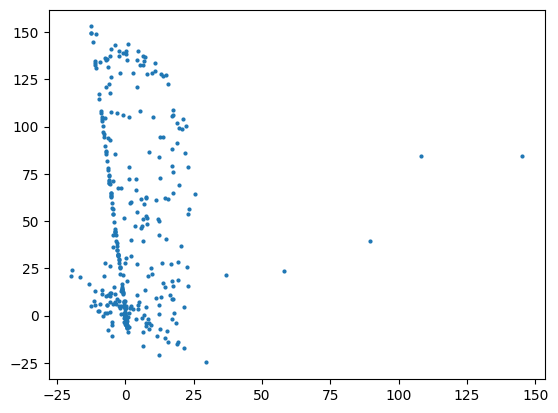

In [4]:
import matplotlib.pyplot as plt
plt.scatter(Y.T[0],Y.T[1],s=4)
plt.show()

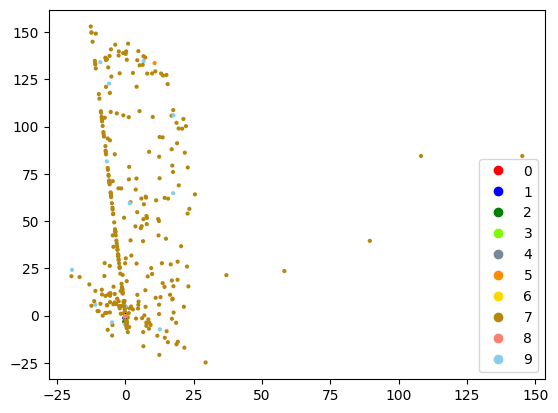

In [ ]:
from matplotlib. colors import ListedColormap
color = ['red','blue','green','lawngreen','lightslategray',
         'darkorange','gold','darkgoldenrod','salmon','skyblue']
colors = np.vectorize(lambda x: color[x])(train[1])
sc = plt.scatter(Y.T[0],Y.T[1],s=4, c=train[1], cmap=ListedColormap(color))
plt.legend(handles=sc. legend_elements ()[ 0 ], labels=list(range(10)))
plt.show()

In [ ]:
ans = test[1]
n = 100
tests = test[0].reshape(10000,28**2)[:n]
tests = tests-tests.mean(axis=0)
tests = tests.dot(Vectors)
tests.shape,Y.shape

((100, 784), (55000, 784))

In [ ]:
from scipy.spatial.distance import cdist
d = 2
distances = cdist(tests[:,:d], Y[:,:d])
distances.shape
k=5
ind = np.argpartition(distances[0,:], k)[:k]
ind.shape

(5,)

In [ ]:
def indexes(test,d,k):
  #возвращает список рассотяний от данной картинки до всех в Trainе
  test = test[:d].reshape((1,d))
  distance = cdist(test, Y[:,:d]).reshape(55000)
  ind = np.argpartition(distance, k)[:k]
  return ind
indexes(tests[0,:],2,7).shape, ans[:5]

((7,), array([7, 2, 1, 0, 4], dtype=uint8))

In [ ]:
def frequency(ind):
  vars = train[1][ind]
  vals, counts = np.unique(vars, return_counts=True)
  return vals[np.argmax(counts)]

def proc(d,k):
  results = np.vectorize(lambda x: int(ans[x] == frequency(indexes(tests[x],d,k))))(np.arange(len(tests)))
  return results.sum()*10000//len(tests)/100

proc(200,100),len(tests)

(39.0, 100)

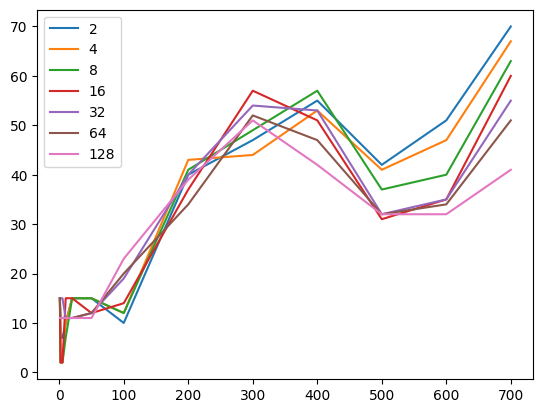

In [ ]:
d = np.array([1,2,5,10,20,50,100,200,300,400,500,600,700])
ks = np.vectorize(lambda x: 2**x)(np.arange(1,8))
for t in range(7):
  k = ks[t]
  res = np.vectorize(lambda x: proc(x,k))(d)
  plt.plot(d,res)
plt.legend(ks)
plt.show()

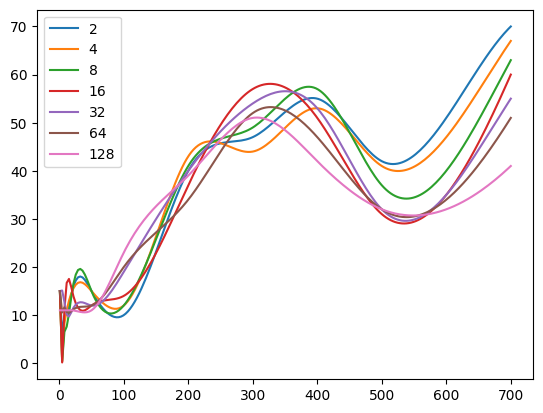

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline

for t in range(7):
  k = ks[t]
  res = np.vectorize(lambda x: proc(x,k))(d)
  xnew = np.linspace (d. min (), d. max (), 200 )
  spl = make_interp_spline (d, res, k= 3 )
  y_smooth = spl (xnew)
  plt.plot (xnew, y_smooth)
plt.legend(ks)
plt.show()

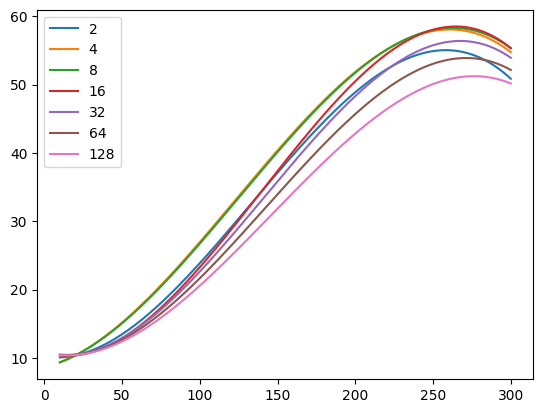

In [ ]:
ans = test[1]
n = 10000
tests = test[0].reshape(10000,28**2)[:n]
tests = tests-tests.mean(axis=0)
tests = tests.dot(Vectors)
tests.shape,Y.shape

d = np.array([10,20,200,300])
ks = np.vectorize(lambda x: 2**x)(np.arange(1,8))
for t in range(7):
  k = ks[t]
  res = np.vectorize(lambda x: proc(x,k))(d)
  xnew = np.linspace (d. min (), d. max (), 200 )
  spl = make_interp_spline (d, res, k= 3 )
  y_smooth = spl (xnew)
  plt.plot (xnew, y_smooth)
plt.legend(ks)
plt.show()

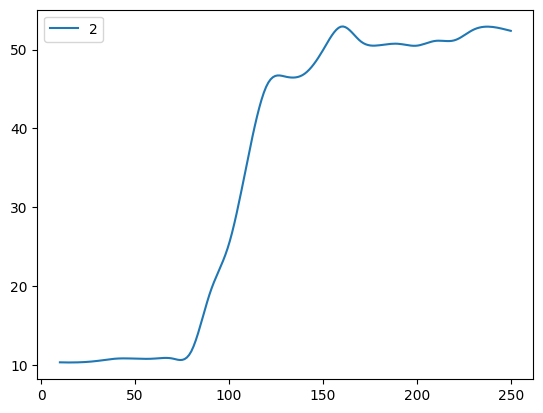

In [ ]:
d = np.arange(10,260,10)
k = 16
res = np.vectorize(lambda x: proc(x,k))(d)
xnew = np.linspace (d. min (), d. max (), 200 )
spl = make_interp_spline (d, res, k= 3 )
y_smooth = spl (xnew)
plt.plot (xnew, y_smooth)
plt.legend(ks)
plt.show()

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240])

In [ ]:
class my_PCA():
    def __init__(self, n_components=None):
        pass

    def fit(self, X):
        pass

    def transform(self, X):
        pass

    def fit_transform(self, X):
        pass

In [ ]:
class my_kNN():
    def __init__(self, n_neighbors=5):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass